# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [4]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())


['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


## Step 2 

In [6]:
#We identify if the result is a W/D/L for the home and away team, and give the values 1/0.5/0 to each respectively.
#We also add the count for the game counter.
EPL18['hvalue']=np.where(EPL18['FTR']=='H',1,np.where(EPL18['FTR']=='D',.5,0))
EPL18['avalue']=np.where(EPL18['FTR']=='A',1,np.where(EPL18['FTR']=='D',.5,0))
EPL18['count']=1
EPL18=EPL18.rename(columns={'FTHG':'HomeG', 'FTAG':'AwayG', 'FTR':'Result'})
#EPL18

## Step 3 : Home Games for Each Team

In [7]:
EPLhome = EPL18[['HomeTeam', 'HomeG', 'AwayG', 'hvalue', 'count', 'Date']].copy()
EPLhome['home']=1
EPLhome = EPLhome.rename(columns={'HomeTeam':'team','HomeG':'GF','AwayG':'GA', 'hvalue':'value'})

## Step 4 : Away Games for Each Team

In [9]:
EPLaway = EPL18[['AwayTeam','AwayG', 'HomeG', 'avalue','count', 'Date']].copy()
EPLaway['home']=0
EPLaway = EPLaway.rename(columns={'AwayTeam':'team','AwayG':'GF','HomeG':'GA', 'avalue':'value'})
EPLaway

,team,GF,GA,value,count,Date,home
0,Leicester,3,4,0.0,1,20170811,0
1,Man City,2,0,1.0,1,20170812,0
2,Burnley,3,2,1.0,1,20170812,0
3,Huddersfield,3,0,1.0,1,20170812,0
4,Stoke,0,1,0.0,1,20170812,0
5,Swansea,0,0,0.5,1,20170812,0
6,Liverpool,3,3,0.5,1,20170812,0
7,Bournemouth,0,1,0.0,1,20170812,0
8,West Ham,0,4,0.0,1,20170813,0
9,Tottenham,2,0,1.0,1,20170813,0


## Step 5

In [6]:
#merge the home and away dfs to get every team's results
EPL18=pd.concat([EPLhome, EPLaway])
EPL18


,team,GF,GA,value,count,Date,home
0,Arsenal,4,3,1.0,1,20170811,1
1,Brighton,0,2,0.0,1,20170812,1
2,Chelsea,2,3,0.0,1,20170812,1
3,Crystal Palace,0,3,0.0,1,20170812,1
4,Everton,1,0,1.0,1,20170812,1
5,Southampton,0,0,0.5,1,20170812,1
6,Watford,3,3,0.5,1,20170812,1
7,West Brom,1,0,1.0,1,20170812,1
8,Man United,4,0,1.0,1,20170813,1
9,Newcastle,0,2,0.0,1,20170813,1


## Step 6: Split the Season in two halves

In [8]:
Half1=EPL18[EPL18.Date<20180000]
Half2=EPL18[EPL18.Date>20180000]
Half2.describe()

,GF,GA,value,count,Date,home
count,342.000000,342.000000,342.000000,342.0,3.420000e+02,342.000000
mean,1.353801,1.353801,0.500000,1.0,2.018030e+07,0.500000
std,1.213548,1.213548,0.433224,0.0,1.398546e+02,0.500733
min,0.000000,0.000000,0.000000,1.0,2.018010e+07,0.000000
25%,0.000000,0.000000,0.000000,1.0,2.018020e+07,0.000000
50%,1.000000,1.000000,0.500000,1.0,2.018031e+07,0.500000
75%,2.000000,2.000000,1.000000,1.0,2.018042e+07,1.000000
max,5.000000,5.000000,1.000000,1.0,2.018051e+07,1.000000


## Optional steps, not required for Assessment 
### (Uncomment to run)

In [ ]:
# Plot the data

#sns.relplot(x="pyth17", y="wpc17", data =EPL17)

In [ ]:
# Run the regression

#pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=EPL17).fit()
#pyth_lm.summary()

## Step 7: Total Performance of each team for 1st half

In [9]:
Half1perf=Half1.groupby('team')['count','value','GF','GA'].sum().reset_index()
Half1perf=Half1perf.rename(columns={'count':'count1', 'value': 'value1', 'GF': 'GF1', 'GA':'GA1'})
Half1perf

,team,count1,value1,GF1,GA1
0,Arsenal,21,13.5,38,26
1,Bournemouth,21,7.5,20,32
2,Brighton,21,8.5,15,25
3,Burnley,21,12.5,18,17
4,Chelsea,21,15.5,39,14
5,Crystal Palace,21,7.5,18,32
6,Everton,21,10.0,25,32
7,Huddersfield,21,9.0,18,32
8,Leicester,21,10.0,31,32
9,Liverpool,21,15.0,48,24


## Step 8: Calculate WP and Pyth. Exp. for 1st half

In [10]:
Half1perf['wpc1'] = Half1perf['value1']/Half1perf['count1']
Half1perf['pyth1'] = Half1perf['GF1']**2/(Half1perf['GF1']**2 + Half1perf['GA1']**2)
Half1perf

,team,count1,value1,GF1,GA1,wpc1,pyth1
0,Arsenal,21,13.5,38,26,0.642857,0.681132
1,Bournemouth,21,7.5,20,32,0.357143,0.280899
2,Brighton,21,8.5,15,25,0.404762,0.264706
3,Burnley,21,12.5,18,17,0.595238,0.528548
4,Chelsea,21,15.5,39,14,0.738095,0.885847
5,Crystal Palace,21,7.5,18,32,0.357143,0.240356
6,Everton,21,10.0,25,32,0.476190,0.379018
7,Huddersfield,21,9.0,18,32,0.428571,0.240356
8,Leicester,21,10.0,31,32,0.476190,0.484131
9,Liverpool,21,15.0,48,24,0.714286,0.800000


## Step 9 (Step 7,8 for 2nd half)

In [14]:
Half2perf=Half2.groupby('team')['count','value','GF','GA'].sum().reset_index()
Half2perf=Half2perf.rename(columns={'count':'count2', 'value': 'value2', 'GF': 'GF2', 'GA':'GA2'})
Half2perf

,team,count2,value2,GF2,GA2
0,Arsenal,17,8.5,36,25
1,Bournemouth,17,9.0,25,29
2,Brighton,17,7.0,19,29
3,Burnley,17,7.5,18,22
4,Chelsea,17,9.0,23,24
5,Crystal Palace,17,9.0,27,23
6,Everton,17,8.0,19,26
7,Huddersfield,17,5.0,10,26
8,Leicester,17,7.5,25,28
9,Liverpool,17,12.0,36,14


In [16]:
Half2perf['wpc2'] = Half2perf['value2']/Half2perf['count2']
Half2perf['pyth2'] = Half2perf['GF2']**2/(Half2perf['GF2']**2 + Half2perf['GA2']**2)
Half2perf

,team,count2,value2,GF2,GA2,wpc2,pyth2
0,Arsenal,17,8.5,36,25,0.500000,0.674649
1,Bournemouth,17,9.0,25,29,0.529412,0.426330
2,Brighton,17,7.0,19,29,0.411765,0.300333
3,Burnley,17,7.5,18,22,0.441176,0.400990
4,Chelsea,17,9.0,23,24,0.529412,0.478733
5,Crystal Palace,17,9.0,27,23,0.529412,0.579491
6,Everton,17,8.0,19,26,0.470588,0.348120
7,Huddersfield,17,5.0,10,26,0.294118,0.128866
8,Leicester,17,7.5,25,28,0.441176,0.443577
9,Liverpool,17,12.0,36,14,0.705882,0.868633


## Optional steps, not required for Assessment
### (Uncomment to run)

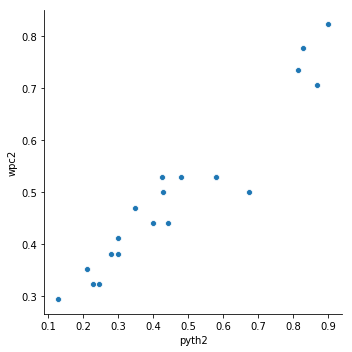

In [18]:
# Plot the data

sns.relplot(x="pyth2", y="wpc2", data =Half2perf)

In [27]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc2 ~ pyth2', data=Half2perf).fit()
pyth_lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wpc2   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sat, 07 May 2022   Prob (F-statistic):           5.02e-11
Time:                        11:16:26   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth2          0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [20]:
Half2predictor = pd.merge(Half1perf,Half2perf, on='team')
Half2predictor

,team,count1,value1,GF1,GA1,wpc1,pyth1,count2,value2,GF2,GA2,wpc2,pyth2
0,Arsenal,21,13.5,38,26,0.642857,0.681132,17,8.5,36,25,0.500000,0.674649
1,Bournemouth,21,7.5,20,32,0.357143,0.280899,17,9.0,25,29,0.529412,0.426330
2,Brighton,21,8.5,15,25,0.404762,0.264706,17,7.0,19,29,0.411765,0.300333
3,Burnley,21,12.5,18,17,0.595238,0.528548,17,7.5,18,22,0.441176,0.400990
4,Chelsea,21,15.5,39,14,0.738095,0.885847,17,9.0,23,24,0.529412,0.478733
5,Crystal Palace,21,7.5,18,32,0.357143,0.240356,17,9.0,27,23,0.529412,0.579491
6,Everton,21,10.0,25,32,0.476190,0.379018,17,8.0,19,26,0.470588,0.348120
7,Huddersfield,21,9.0,18,32,0.428571,0.240356,17,5.0,10,26,0.294118,0.128866
8,Leicester,21,10.0,31,32,0.476190,0.484131,17,7.5,25,28,0.441176,0.443577
9,Liverpool,21,15.0,48,24,0.714286,0.800000,17,12.0,36,14,0.705882,0.868633


## Step 10: Find Correlations to estimate predictions

In [23]:
keyvars = Half2predictor[['team','wpc2','wpc1','pyth1','pyth2']]
keyvars.corr()
#keyvars = keyvars.sort_values(by=['wpc2'],ascending=False)
#keyvars

,wpc2,wpc1,pyth1,pyth2
wpc2,1.000000,0.756573,0.795693,0.955986
wpc1,0.756573,1.000000,0.968204,0.745832
pyth1,0.795693,0.968204,1.000000,0.795331
pyth2,0.955986,0.745832,0.795331,1.000000


## Optional steps, not required for Assessment
### (Uncomment to run)

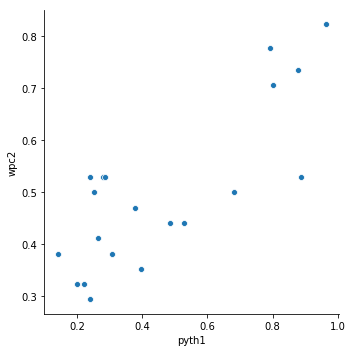

In [24]:
sns.relplot(x="pyth1", y="wpc2", data =Half2predictor)

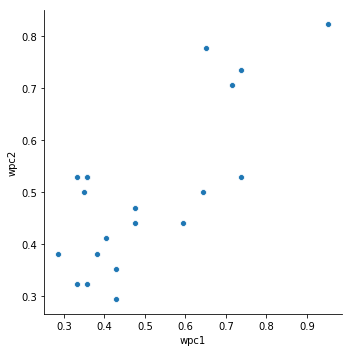

In [22]:
sns.relplot(x="wpc1", y="wpc2", data =Half2predictor)

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?

Τhe results seem to be even better, because we can see that the correlation between pythagorean expectation 1 and win percentage 2 is even higher than in the case of the MLB.